<a href="https://colab.research.google.com/github/tvaditya/CursoIADev/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




*by TV Aditya*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", parse_dates=True)


## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

...

...

### Análise Exploratória Inicial

* *Visualizar as 5 primeiras entradas*
    * `df.head()`
* *Qual o tamanho do seu DataFrame*
    * `df.shape`
* *Extrair e imprimir os nomes das colunas*
    * `df.columns`
* *Quais os tipos das variáveis*
    * `df.dtypes`
* *Identifique a porcentagem de valores ausentes das colunas*
    * `df.isnull().sum() / df.shape[0]` ou
    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)` *para ordem decrescente.*
* *Transforme a coluna `date` no formato `datetime`*
    * `df.date = pd.to_datetime(df.date)`
* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


Vamos......

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
df.shape

(110059, 62)

In [ ]:
df.date =pd.to_datetime(df.date, format="%Y-%m-%d")

In [ ]:
df.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
                                   ...      
handwashing_facilities               float64
hospital_beds_per_thousand           float64
life_expectancy                      float64
human_development_index              float64
excess_mortality                     float64
Length: 62, dtype: object

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.052270e+05,105224.000000,104214.000000,9.477200e+04,94927.000000,104214.000000,104670.000000,104667.000000,103662.000000,94228.000000,94383.000000,103662.000000,88702.000000,11836.000000,11836.000000,14215.000000,14215.000000,1038.000000,1038.000000,2014.000000,2014.000000,4.863300e+04,4.833800e+04,48338.000000,48633.000000,5.718200e+04,57182.000000,53509.000000,52877.000000,2.198100e+04,2.105000e+04,1.806100e+04,1.880000e+02,1.823000e+04,3.890800e+04,21981.000000,21050.000000,18061.000000,188.000000,38908.000000,91776.000000,1.092880e+05,101978.000000,97762.000000,96670.000000,97224.000000,98177.000000,66057.000000,98085.000000,100826.000000,76627.000000,75509.000000,49268.000000,89239.000000,104412.000000,98182.000000,3874.000000
mean,1.240222e+06,6255.041055,6259.989341,3.249932e+04,145.759657,131.968884,15349.439034,78.701054,78.705509,330.725544,1.535929,1.390524,1.009840,961.711980,23.903482,4273.310025,155.415719,239.875793,18.427844,2969.502138,90.866267,5.061584e+04,9.048985e+06,376.158612,2.279835,4.774511e+04,2.181541,0.087877,161.136250,4.873434e+07,2.599574e+07,1.526375e+07,2.217924e+05,7.816646e+05,3.721254e+05,34.043458,21.204122,14.905976,0.607553,3486.531048,57.644286,1.229788e+08,392.462800,30.542738,8.776501,5.554592,19280.690754,13.449560,258.884744,7.965008,10.583136,32.720359,50.782815,3.025537,73.253292,0.726916,18.202006
std,8.384801e+06,38519.634365,38091.561592,1.939637e+05,796.203330,742.310830,27160.351007,203.052562,159.462424,579.646561,3.939591,2.995185,0.351592,2760.481182,26.112904,11413.528818,201.991343,531.592370,33.559604,9959.533137,192.891969,1.833785e+05,3.906016e+07,910.178514,6.316057,1.650769e+05,5.407723,0.097103,876.804623,2.709628e+08,1.449374e+08,7.979607e+07,4.219590e+05,3.651886e+06,2.462399e+06,38.813147,21.938343,18.194605,2.020446,4575.722591,20.873327,6.749916e+08,1828.468851,9.127664,6.201474,4.229651,20036.317933,19.975952,119.185897,4.199294,10.485919,13.494754,31.756053,2.455717,7.551867,0.150296,35.407299
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3162.163000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.901036e+06,0.000000e+00,0.000000,-53.318000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.579000e+03,2.000000,8.143000,6.100000e+01,0.000000,0.000000,300.684000,0.247000,1.437000,9.199750,0.000000,0.000000,0.840000,29.000000,3.798000,107.000000,20.398000,6.926750,1.573000,36.010000,7.534000,1.7940

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20) 

total_boosters                           0.998292
total_boosters_per_hundred               0.998292
weekly_icu_admissions_per_million        0.990569
weekly_icu_admissions                    0.990569
weekly_hosp_admissions_per_million       0.981701
weekly_hosp_admissions                   0.981701
excess_mortality                         0.964801
icu_patients_per_million                 0.892458
icu_patients                             0.892458
hosp_patients_per_million                0.870842
hosp_patients                            0.870842
people_fully_vaccinated                  0.835897
people_fully_vaccinated_per_hundred      0.835897
new_vaccinations                         0.834362
people_vaccinated                        0.808739
people_vaccinated_per_hundred            0.808739
total_vaccinations_per_hundred           0.800280
total_vaccinations                       0.800280
new_vaccinations_smoothed_per_million    0.646481
new_vaccinations_smoothed                0.646481


In [ ]:
print(df.date.max())
print(df.date.min())

2021-08-16 00:00:00
2020-01-01 00:00:00


In [ ]:
df.loc[(df.date == '2021-08-15') & (df.continent.isnull()==False)].sort_values(by="total_cases", ascending=False).head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
104867,USA,North America,United States,2021-08-15,36678753.0,38482.0,130709.714,621635.0,382.0,678.571,110811.056,116.259,394.890,1878.036,1.154,2.050,NaN,20269.0,61.235,79199.0,239.27,NaN,NaN,81012.0,244.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356433665.0,198088722.0,168362058.0,NaN,664840.0,718962.0,106.58,59.23,50.34,NaN,2150.0,56.02,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
46004,IND,Asia,India,2021-08-15,32225513.0,32937.0,36508.429,431642.0,417.0,476.143,23351.747,23.867,26.455,312.783,0.302,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923863.0,493624440.0,357.698,1.394,1940751.0,1.406,0.019,53.2,samples tested,NaN,NaN,NaN,NaN,NaN,5502629.0,NaN,NaN,NaN,NaN,3987.0,74.54,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN
14484,BRA,South America,Brazil,2021-08-15,20364099.0,13957.0,28346.714,569058.0,270.0,843.857,95804.270,65.662,133.359,2677.172,1.270,3.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164638573.0,119793423.0,49629214.0,NaN,1185971.0,1664219.0,77.46,56.36,23.35,NaN,7829.0,51.39,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
36109,FRA,Europe,France,2021-08-15,6543099.0,21172.0,24535.714,112873.0,44.0,66.571,96842.619,313.361,363.146,1670.602,0.651,0.985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80791094.0,46219615.0,35526110.0,NaN,86275.0,441708.0,119.58,68.41,52.58,NaN,6538.0,NaN,6.756425e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
82244,RUS,Europe,Russia,2021-08-15,6511431.0,21010.0,21255.714,167595.0,800.0,783.714,44618.872,143.969,145.652,1148.426,5.482,5.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441676.0,3.027,0.048,20.8,tests performed,73164150.0,40731280.0,32432870.0,NaN,268500.0,988375.0,50.13,27.91,22.22,NaN,6773.0,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
104294,GBR,Europe,United Kingdom,2021-08-15,6297157.0,26484.0,28434.286,131269.0,59.0,91.286,92760.755,390.125,418.853,1933.668,0.869,1.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,661103.0,231588398.0,3411.431,9.738,747277.0,11.008,0.038,26.3,tests performed,88037283.0,47333702.0,40703581.0,NaN,157640.0,203729.0,129.68,69.73,59.96,NaN,3001.0,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
101851,TUR,Asia,Turkey,2021-08-15,6078623.0,18847.0,26111.714,53159.0,154.0,153.000,72073.633,223.467,309.604,630.301,1.826,1.814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83338627.0,43946656.0,32807818.0,NaN,473130.0,1044177.0,98.81,52.11,38.90,

In [ ]:
df.loc[(df.date == '2021-08-15') & (df.continent.isnull()==False)].sort_values(by="total_deaths", ascending=False).head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
104867,USA,North America,United States,2021-08-15,36678753.0,38482.0,130709.714,621635.0,382.0,678.571,110811.056,116.259,394.890,1878.036,1.154,2.050,NaN,20269.0,61.235,79199.0,239.27,NaN,NaN,81012.0,244.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356433665.0,198088722.0,168362058.0,NaN,664840.0,718962.0,106.58,59.23,50.34,NaN,2150.0,56.02,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
14484,BRA,South America,Brazil,2021-08-15,20364099.0,13957.0,28346.714,569058.0,270.0,843.857,95804.270,65.662,133.359,2677.172,1.270,3.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164638573.0,119793423.0,49629214.0,NaN,1185971.0,1664219.0,77.46,56.36,23.35,NaN,7829.0,51.39,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
46004,IND,Asia,India,2021-08-15,32225513.0,32937.0,36508.429,431642.0,417.0,476.143,23351.747,23.867,26.455,312.783,0.302,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923863.0,493624440.0,357.698,1.394,1940751.0,1.406,0.019,53.2,samples tested,NaN,NaN,NaN,NaN,NaN,5502629.0,NaN,NaN,NaN,NaN,3987.0,74.54,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN
64544,MEX,North America,Mexico,2021-08-15,3091971.0,0.0,17164.857,248167.0,0.0,535.286,23981.269,0.000,133.130,1924.779,0.000,4.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3985.0,8635667.0,66.978,0.031,31753.0,0.246,0.424,2.4,people tested,77225451.0,54305039.0,29239686.0,NaN,638029.0,727541.0,59.90,42.12,22.68,NaN,5643.0,67.13,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN
78909,PER,South America,Peru,2021-08-15,2133812.0,978.0,1209.571,197393.0,53.0,63.286,64716.182,29.662,36.685,5986.714,1.607,1.919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16135739.0,9215626.0,6920113.0,NaN,103936.0,111522.0,48.94,27.95,20.99,NaN,3382.0,74.07,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,NaN
82244,RUS,Europe,Russia,2021-08-15,6511431.0,21010.0,21255.714,167595.0,800.0,783.714,44618.872,143.969,145.652,1148.426,5.482,5.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441676.0,3.027,0.048,20.8,tests performed,73164150.0,40731280.0,32432870.0,NaN,268500.0,988375.0,50.13,27.91,22.22,NaN,6773.0,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
104294,GBR,Europe,United Kingdom,2021-08-15,6297157.0,26484.0,28434.286,131269.0,59.0,91.286,92760.755,390.125,418.853,1933.668,0.869,1.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,661103.0,231588398.0,3411.431,9.738,747277.0,11.008,0.038,26.3,tests performed,88037283.0,47333702.0,40703581.0,NaN,157640.

In [ ]:
top10_total_deaths = df.loc[(df.date == '2021-08-15') & (df.continent.isnull()==False), ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:10]

In [ ]:
top10_total_deaths

,location,total_deaths
104867,United States,621635.0
14484,Brazil,569058.0
46004,India,431642.0
64544,Mexico,248167.0
78909,Peru,197393.0
82244,Russia,167595.0
104294,United Kingdom,131269.0
50030,Italy,128432.0
21741,Colombia,123459.0
46537,Indonesia,117588.0


In [ ]:
countries = list(top10_total_deaths.location.unique())
countries

['United States',
 'Brazil',
 'India',
 'Mexico',
 'Peru',
 'Russia',
 'United Kingdom',
 'Italy',
 'Colombia',
 'Indonesia']

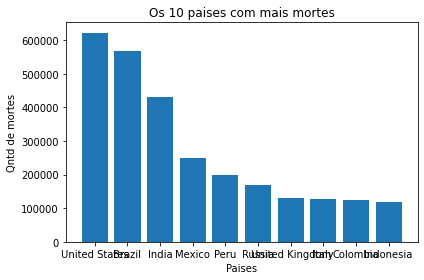

In [ ]:
# ax.bar('location', 'total_deaths', data=top5_total_deaths)
fig, ax = plt.subplots()
ax.bar('location', 'total_deaths', data=top10_total_deaths)
ax.set_title("Os 10 paises com mais mortes")
ax.set_xlabel("Paises")
ax.set_ylabel("Qntd de mortes")

plt.tight_layout()

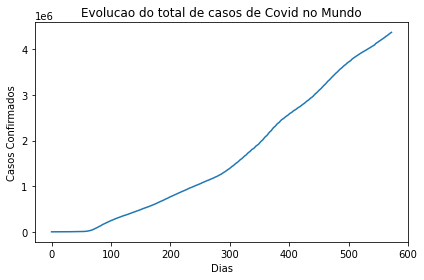

In [ ]:
fig, ax = plt.subplots()

df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
ax.set_title("Evolucao do total de casos de Covid no Mundo")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Dias")

plt.tight_layout()

In [ ]:
!pip install bar_chart_race -q

In [ ]:
import bar_chart_race as bcr

df_countries = df.loc[df.continent.isnull()==False, ['location', 'date', 'new_deaths']].copy()

In [ ]:
df_countries_top_10 = df_countries[df_countries['location'].isin(countries)]

In [ ]:
df_countries.head()

,location,date,new_deaths
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN


In [ ]:
df_countries_top_10['new_deaths'] = df_countries_top_10['new_deaths'].fillna(0)
# df_countries['total_cases'] = df_countries['total_cases'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_countries_top_10.head()

,location,date,new_deaths
13948,Brazil,2020-02-26,0.0
13949,Brazil,2020-02-27,0.0
13950,Brazil,2020-02-28,0.0
13951,Brazil,2020-02-29,0.0
13952,Brazil,2020-03-01,0.0


In [ ]:
df_pivot = df_countries_top_10.pivot_table(values='new_deaths', index='date', columns='location', fill_value=0).copy()
df_pivot

location,Brazil,Colombia,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
date,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-12,1148,144,585,1466,30,608,63,788,95,614
2021-08-13,966,124,478,1432,45,603,70,795,100,1889
2021-08-14,926,135,493,1270,34,753,61,799,94,237


In [ ]:
# df_pivot['date'] = df.index
df_pivot.reset_index(level=0, inplace=True)

In [ ]:
df_pivot

location,date,Brazil,Colombia,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
0,2020-01-01,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
589,2021-08-12,1148,144,585,1466,30,608,63,788,95,614
590,2021-08-13,966,124,478,1432,45,603,70,795,100,1889
591,2021-08-14,926,135,493,1270,34,753,61,799,94,237
592,2021-08-15,270,103,417,1222,19,0,53,800,59,382


In [ ]:
df_pivot.dtypes


location
date              datetime64[ns]
Brazil                     int64
Colombia                   int64
India                      int64
Indonesia                  int64
Italy                      int64
Mexico                     int64
Peru                       int64
Russia                     int64
United Kingdom             int64
United States              int64
dtype: object

In [ ]:
df_pivot.reset_index(drop=True, inplace=True)

In [ ]:
df_pivot_monthly = df_pivot.groupby(pd.Grouper(key='date', freq='1M')).sum().cumsum(axis = 0)

In [ ]:
df_pivot_monthly

location,Brazil,Colombia,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
date,,,,,,,,,,
2020-01-31,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,0,0,29,0,0,0,0,1
2020-03-31,201,16,35,136,12428,29,138,17,2457,5362
2020-04-30,6006,293,1154,792,27967,1859,4782,1073,26754,66187
2020-05-31,29314,939,5408,1613,33415,9930,20710,4693,37527,107732
2020-06-30,59594,3334,17400,2876,34767,27769,37898,9306,40479,127469
2020-07-31,92475,10105,36511,5131,35141,46688,55982,13939,41274,153987
2020-08-31,121381,19662,65288,7417,35483,64414,73612,17128,41589,183614
2020-09-30,143952,25998,98678,10740,35894,77646,82135,20630,42233,207013


In [ ]:
bcr.bar_chart_race(
    df=df_pivot_monthly, 
    filename=None,
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=10, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=True, # máximo fixo
    steps_per_period=10, # stepos por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_fmt='%B %d, %Y', # formato do período
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total de mortes: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    perpendicular_bar_func='mean', # função da barra perpendicular
    period_length=1000,# tamanho do período
    figsize=(5, 3), # tamanho da período
    dpi=144, 
    cmap='dark12', # esquema de cores
    title='Top 10 Paises mortes por Covid', # título
    title_size='', # tamamnho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False) 

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [ ]:
df_brasil = df.loc[df.location == "Brazil"].copy()

In [ ]:
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
13948,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13949,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13950,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13951,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
13952,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
